In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.layers import Dense
from keras.models import Model
import matplotlib.pyplot as plt

Предобработка данных

In [52]:
list_cats = np.array(os.listdir("D:\Projects\python\PetImages\Cat"))
cats = np.array(['D:\Projects\python\PetImages\Cat/' + list_cats[x] for x in range(12501)])

list_dogs = np.array(os.listdir("D:\Projects\python\PetImages\Dog"))
dogs = np.array(['D:\Projects\python\PetImages\Dog/' + list_dogs[x] for x in range(12501)])

In [53]:
dogs_cats_list = np.concatenate((cats, dogs))
cats_labels = np.zeros(12501)
dogs_labels = np.ones(12501)
labels = np.concatenate((cats_labels, dogs_labels))

In [54]:
df_cats_dogs = pd.DataFrame({'images':dogs_cats_list, 'labels':labels})
df_cats_dogs.head()

,images,labels
0,D:\Projects\python\PetImages\Cat/0.jpg,0.0
1,D:\Projects\python\PetImages\Cat/1.jpg,0.0
2,D:\Projects\python\PetImages\Cat/10.jpg,0.0
3,D:\Projects\python\PetImages\Cat/100.jpg,0.0
4,D:\Projects\python\PetImages\Cat/1000.jpg,0.0


In [55]:
arr_cats_dogs = np.array(df_cats_dogs)
np.random.shuffle(arr_cats_dogs)
dogs_cats_list = arr_cats_dogs[:, 0]
labels = arr_cats_dogs[:, 1]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dogs_cats_list, labels, test_size=0.20)

In [185]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 5
IMG_SIZE = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


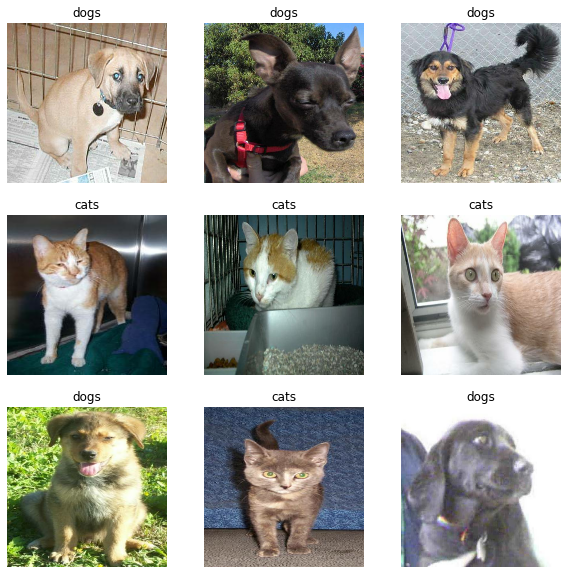

In [10]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [57]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

VGG16

In [186]:
vgg = tf.keras.applications.VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [204]:
inp = vgg.input

new_classification_layer = Dense(1, activation='sigmoid')

out = new_classification_layer(vgg.layers[-2].output)

model_new = Model(inp, out)

In [205]:
model_new.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [206]:
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

In [207]:
model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [193]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


Обучение модели

In [208]:
history = model_new.fit(train_dataset, batch_size=5, epochs=5, steps_per_epoch=10)

Epoch 1/5
10/10 [==============================] - 17s 2s/step - loss: 0.0000e+00 - accuracy: 0.5400
Epoch 2/5
10/10 [==============================] - 17s 2s/step - loss: 0.0000e+00 - accuracy: 0.4800
Epoch 3/5
10/10 [==============================] - 17s 2s/step - loss: 0.0000e+00 - accuracy: 0.5600
Epoch 4/5
10/10 [==============================] - 16s 2s/step - loss: 0.0000e+00 - accuracy: 0.5200
Epoch 5/5
10/10 [==============================] - 17s 2s/step - loss: 0.0000e+00 - accuracy: 0.5000


Аугментация данных

In [133]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

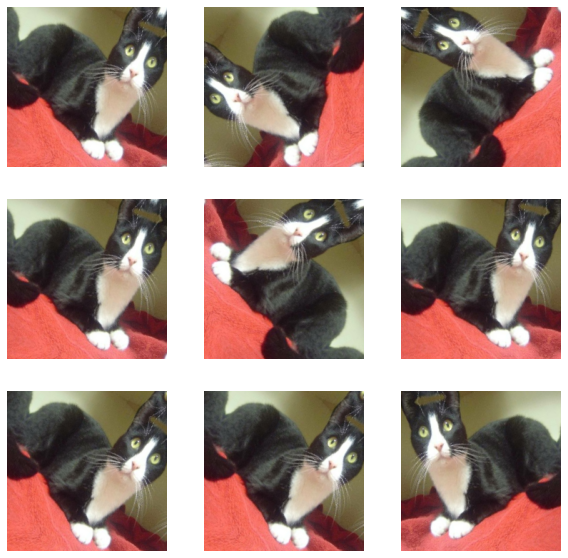

In [144]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

Тонкая настройка

In [209]:
model_new.trainable = True

In [210]:
print("Number of layers in the base model: ", len(model_new.layers))

# Fine-tune from this layer onwards
fine_tune_at = 21

# Freeze all the layers before the `fine_tune_at` layer
for layer in model_new.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  23


In [212]:
model_new.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

In [213]:
model_new.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [214]:
len(model_new.trainable_variables)

4

In [215]:
history_fine = model_new.fit(train_dataset, epochs=10, initial_epoch=history.epoch[-1], steps_per_epoch=10)

Epoch 5/10
10/10 [==============================] - 19s 2s/step - loss: 15.6831 - accuracy: 0.7400
Epoch 6/10
10/10 [==============================] - 18s 2s/step - loss: 2.3490 - accuracy: 0.8800
Epoch 7/10
10/10 [==============================] - 18s 2s/step - loss: 4.7273e-04 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 18s 2s/step - loss: 4.7989 - accuracy: 0.8800
Epoch 9/10
10/10 [==============================] - 18s 2s/step - loss: 0.4079 - accuracy: 0.9800
Epoch 10/10
10/10 [==============================] - 18s 2s/step - loss: 0.4200 - accuracy: 0.9600


При помощи тонкой настройки и изменения скорости обучения удалось добиться наилучшего качества модели.

In [ ]:
model_new.predict(validation_dataset, batch_size=5)

Сериализация

In [229]:
import pickle
model = pickle.dumps(model_new)
type(model), type(model_new)

INFO:tensorflow:Assets written to: ram://f45fa137-a5f2-4e4a-8cbe-6d27b210a626/assets


(bytes, keras.engine.functional.Functional)

In [231]:
with open('data/model_pic_clf.pkl', 'wb') as output:
       pickle.dump(model_new, output)

INFO:tensorflow:Assets written to: ram://271118ba-888b-40da-b753-5fc8e3ec3e3e/assets


In [234]:
import streamlit as st

In [243]:
def main():
    page = st.sidebar.selectbox("Choose a page", ["Description", "Model"])

    if page == "Description":
        st.header("Cats and dogs classifier")
        st.write("Please select a page on the left.")
        st.write("The dataset contains 12501 photos of cats and 12501 photos of dogs. The model predicts the class the photo belongs to.")
    elif page == "Model":
        st.title("Model")
    if st.button("Predict"):
        model_new.predict(validation_dataset)

if __name__ == "__main__":
    main()